In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [2]:
# Carregamento da base de dados
base = pd.read_csv('ADT1m_cov_ANA_1505.csv', sep=';')

base.shape

(164, 40)

In [3]:
print(base.dtypes)

Perfil          object
ADT             object
AREIA           object
SILTE           object
ARGILA          object
FLOC            object
SILTEAR         object
DS              object
DP              object
POROSIDADE      object
CARBONO         object
SOCSRFE         object
SOCSALL         object
SOCS            object
DEM             object
SLOPE           object
ASPECT          object
NORTHERNNESS    object
PLANC           object
PROFC           object
CONVERGENCE     object
CATA            object
TWI             object
LSFACTOR        object
RSP             object
CHND            object
CHNB            object
MRVBF           object
MRRTF           object
NDVI            object
EVI             object
CLAY            object
SAVI            object
GSI             object
IRON            object
Clay_map        object
Silt_map        object
Sand_map        object
X               object
Y               object
dtype: object


In [4]:
base.iloc[:, 1] = base.iloc[:, 1].str.replace(',', '.').astype(float)
base.iloc[:, 2] = base.iloc[:, 2].str.replace(',', '.').astype(float)
base.iloc[:, 3] = base.iloc[:, 3].str.replace(',', '.').astype(float)
base.iloc[:, 4] = base.iloc[:, 4].str.replace(',', '.').astype(float)
base.iloc[:, 10] = base.iloc[:, 10].str.replace(',', '.').astype(float)



Text(0, 0.5, 'ADT')

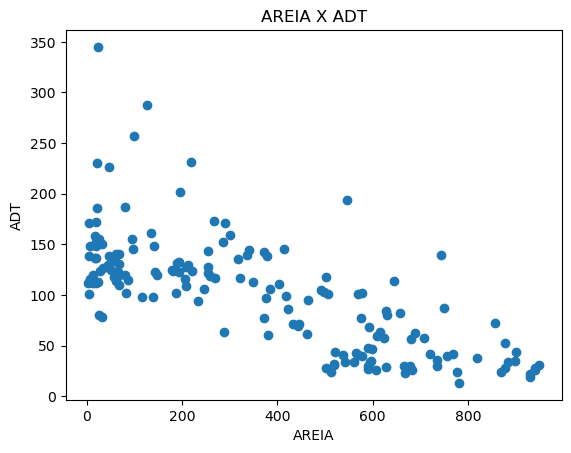

In [5]:
plt.scatter(base.AREIA,  base.ADT)

plt.title('AREIA X ADT')
plt.xlabel('AREIA')
plt.ylabel('ADT')

Text(0, 0.5, 'ADT')

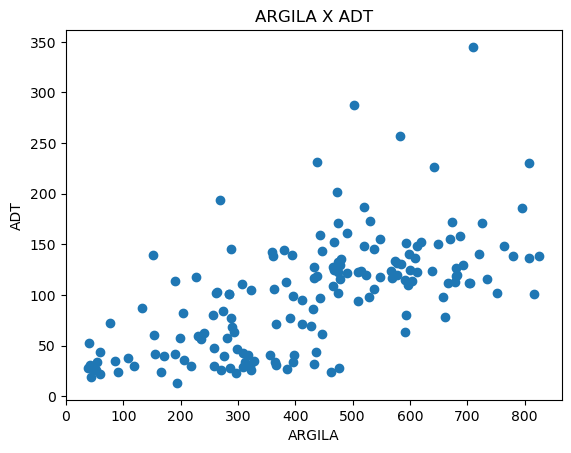

In [6]:
plt.scatter(base.ARGILA,  base.ADT)

plt.title('ARGILA X ADT')
plt.xlabel('ARGILA')
plt.ylabel('ADT')

Text(0, 0.5, 'ARGILA')

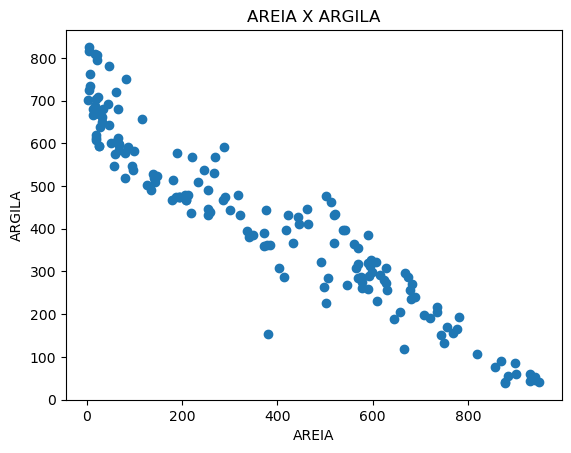

In [7]:
plt.scatter(base.AREIA,  base.ARGILA)

plt.title('AREIA X ARGILA')
plt.xlabel('AREIA')
plt.ylabel('ARGILA')

Text(0, 0.5, 'ADT')

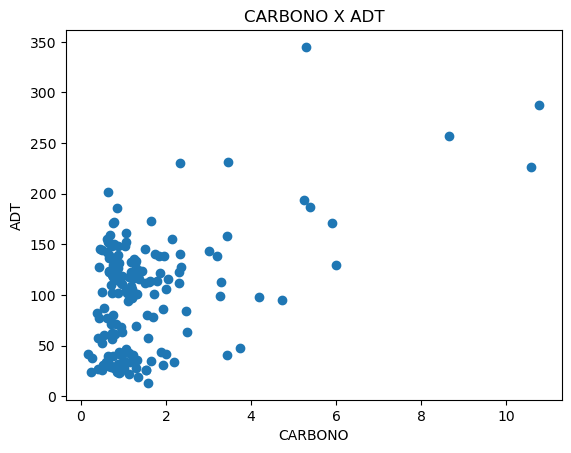

In [8]:
plt.scatter(base.CARBONO,  base.ADT)

plt.title('CARBONO X ADT')
plt.xlabel('CARBONO')
plt.ylabel('ADT')

Text(0, 0.5, 'ADT')

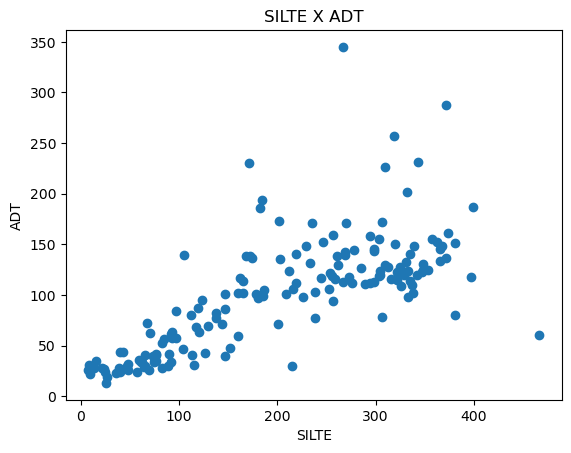

In [9]:
plt.scatter(base.SILTE,  base.ADT)

plt.title('SILTE X ADT')
plt.xlabel('SILTE')
plt.ylabel('ADT')

In [10]:
x = base.iloc[:, 3].values #ADT
y = base.iloc[:, 1].values # Argila
correlacao = np.corrcoef(x, y)
correlacao
# positvo forte 

array([[1.        , 0.71955491],
       [0.71955491, 1.        ]])

In [11]:
# Mudança do formato de X para o formato de matriz (necessário para versões mais recentes do sklearn)
x = x.reshape(-1, 1)

In [12]:
# Criação do modelo, treinamento, visualização dos coeficientes e do score do modelo
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [13]:
#Interceptação
modelo.intercept_

28.426891829754183

In [14]:
#inclinação
modelo.coef_

array([0.35482342])

In [15]:
#score R^2
modelo.score(x, y)
#51% da variável dependente pode ser explicada pelas variávei explanatórias do modelo 

0.5177592666773612

In [16]:
# Geração das previsões
previsoes = modelo.predict(x)
previsoes

array([121.00032299,  99.81736461, 134.16427199,  65.68335128,
       111.10074948,  86.86630966,  57.62885957, 138.31570605,
       100.27863506,  63.02217561,  86.97275669,  74.34104281,
        54.68382516, 112.87486659,  31.97512606,  42.61982876,
       145.87344497, 145.87344497, 169.14986154,  93.1821666 ,
       129.55156749, 118.01980623, 147.29273866, 146.05085668,
       106.13322155, 151.55061974,  55.03864858,  42.61982876,
        55.57088372,  51.7033084 ,  61.07064678,  58.6578475 ,
        49.36147381,  51.56137903,  61.24805849,  43.68429903,
       104.60748083,  36.76524228,  36.23300714,  37.79423021,
       193.98750118,  65.25756318, 142.50262244, 125.29368641,
       102.655952  , 132.92239001, 136.29321253, 111.81039632,
        80.40852335, 123.16474587, 108.79439722,  82.21812281,
       134.16427199,  73.34753723, 153.67956028,  89.10169723,
       158.29226478, 142.68003416, 132.7449783 , 100.13670569,
       106.13322155,  71.11214966, 136.4351419 , 160.42

In [17]:
# Criação do modelo, utilizando a biblioteca statsmodel 
#podemos ver r ajustadodo r2
modelo_ajustado = sm.ols(formula = 'ADT ~ ARGILA', data = base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ADT   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     103.5
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           4.14e-19
Time:                        00:58:41   Log-Likelihood:                -854.09
No. Observations:                 164   AIC:                             1712.
Df Residuals:                     162   BIC:                             1718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.7723      8.210      3.017      0.003       8.559      40.986
ARGILA         0.1781      0.018     10.174      0.000       0.144       0.213
==============================================================================
Omnibus:                       46.752   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.276
Skew:                           1.236   Prob(JB):                     8.37e-24
Kurtosis:                       6.072   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'ADTXARGILA')

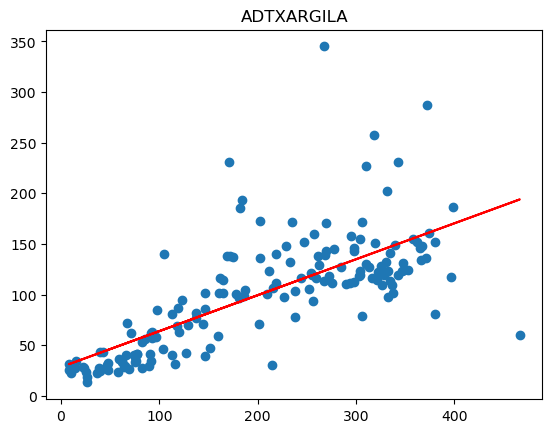

In [18]:
# Visualização dos resultados
plt.scatter(x, y)
plt.plot(x, previsoes, color = 'red')
plt.title( "ADTXARGILA")

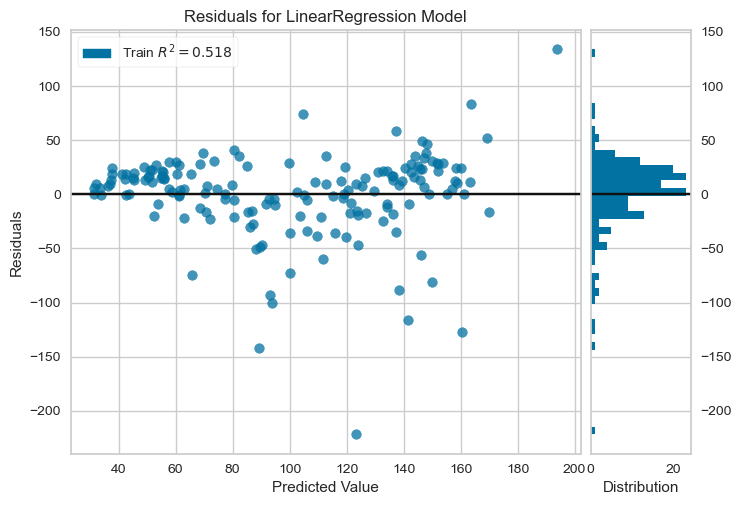

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
from yellowbrick.regressor import ResidualsPlot 

# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()

In [20]:
# Previsão para somente um valor
modelo.predict([[40.5]])

array([42.79724048])

In [36]:
# Criação de novas variáveis X1 e Y1 e novo modelo para comparação com o anterior
# 3 variáveis dependentes para prever adt: argila	areia	silte
x1 = base.iloc[:, 2:5].values
x1
#areia, silte, argila 

array([[378.3, 260.9, 360.8],
       [432.2, 201.2, 366.6],
       [414. , 298. , 288. ],
       [743. , 105. , 152. ],
       [189.5, 233. , 577.5],
       [ 83.7, 164.7, 751.6],
       [877.2,  82.3,  40.5],
       [211.8, 309.7, 478.5],
       [317.5, 202.5, 480. ],
       [628.5,  97.5, 274. ],
       [645.2, 165. , 189.8],
       [442.7, 129.4, 427.9],
       [755. ,  74. , 171. ],
       [372. , 238. , 390. ],
       [930. ,  10. ,  60. ],
       [900. ,  40. ,  60. ],
       [194.8, 331. , 474.2],
       [194.8, 331. , 474.2],
       [ 56.6, 396.6, 546.8],
       [ 22.5, 182.5, 795. ],
       [ 35. , 285. , 680. ],
       [385. , 252.5, 362.5],
       [ 61.5, 335. , 603.5],
       [195.1, 331.5, 473.4],
       [ 14. , 219. , 667. ],
       [143.6, 347. , 509.4],
       [560. ,  75. , 365. ],
       [869. ,  40. ,  91. ],
       [596. ,  76.5, 327.5],
       [536.6,  65.6, 397.8],
       [595. ,  92. , 313. ],
       [679.8,  85.2, 235. ],
       [735. ,  59. , 206. ],
       [67

In [37]:
y1 = base.iloc[:, 1].values
modelo2 = LinearRegression()
modelo2.fit(x1, y1)
#R^2
modelo2.score(x1, y1)

# o score melhorou pela presença de mais de uma variável 

0.5742620971041122

In [38]:
# Criação do modelo ajustado com mais atributos (regressão linear múltipla)
#usando stats models
modelo_ajustado2 = sm.ols(formula = 'ADT ~ AREIA + SILTE + ARGILA', data = base)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

#56% da variável dependente pode ser explicada pelas variávei explanatórias do modelo 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ADT   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     71.94
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.66e-29
Time:                        00:47:30   Log-Likelihood:                -824.58
No. Observations:                 164   AIC:                             1657.
Df Residuals:                     160   BIC:                             1670.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -130.9806    377.744     -0.347      0.729    -876.989     615.027
AREIA          0.1413      0.377      0.374      0.709      -0.604       0.887
SILTE          0.4064      0.377      1.078      0.282      -0.338       1.151
ARGILA         0.2270      0.380      0.597      0.551      -0.523       0.977
==============================================================================
Omnibus:                       82.190   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              386.048
Skew:                           1.858   Prob(JB):                     1.48e-84
Kurtosis:                       9.533   Cond. No.                     7.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Previsão de um novo registro
novo = np.array([743, 260 , 152])
novo = novo.reshape(1, -1)
modelo2.predict(novo)

# quanto de ADT teria em 743 de areia, 260 de silte e 152 de argila

array([114.15456673])